In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.datasets import mnist

In [97]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

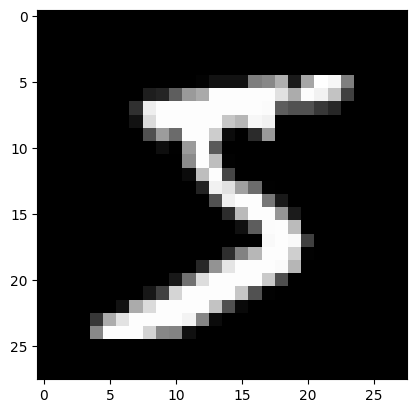

In [98]:
plt.imshow(x_train[0], cmap='gray')

In [99]:
y_train == 5

array([ True, False, False, ...,  True, False, False])

In [100]:
only_fives = x_train[y_train == 5]

In [101]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential

In [102]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28, 28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [103]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape=[codings_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28,28]))

In [104]:
GAN = Sequential([generator, discriminator]) 

In [105]:
discriminator.trainable = False # freeze the discriminator

In [106]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [107]:
batch_size = 32

In [108]:
my_data = only_fives
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [109]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [110]:
epochs = 20

In [111]:
GAN.layers[0].summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 784)            │       118,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 28, 28)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,634 (561.07 KB)

 Trainable params: 143,634 (561.07 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    for X_batch in dataset:
        i = i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        # Train the generator
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

Currently on Epoch 1
	Currently on batch number 100 of 169
Currently on Epoch 2
	Currently on batch number 100 of 169
Currently on Epoch 3
	Currently on batch number 100 of 169
Currently on Epoch 4
	Currently on batch number 100 of 169
Currently on Epoch 5
	Currently on batch number 100 of 169
Currently on Epoch 6
	Currently on batch number 100 of 169
Currently on Epoch 7
	Currently on batch number 100 of 169
Currently on Epoch 8
	Currently on batch number 100 of 169
Currently on Epoch 9
	Currently on batch number 100 of 169
Currently on Epoch 10
	Currently on batch number 100 of 169
Currently on Epoch 11
	Currently on batch number 100 of 169
Currently on Epoch 12
	Currently on batch number 100 of 169
Currently on Epoch 13
	Currently on batch number 100 of 169
Currently on Epoch 14
	Currently on batch number 100 of 169
Currently on Epoch 15
	Currently on batch number 100 of 169
Currently on Epoch 16
	Currently on batch number 100 of 169
Currently on Epoch 17
	Currently on batch number 

In [113]:
noise = tf.random.normal(shape=[10, codings_size])

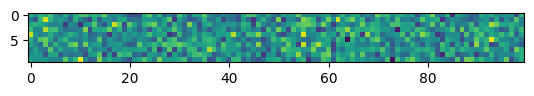

In [114]:
plt.imshow(noise)

In [115]:
images = generator(noise)

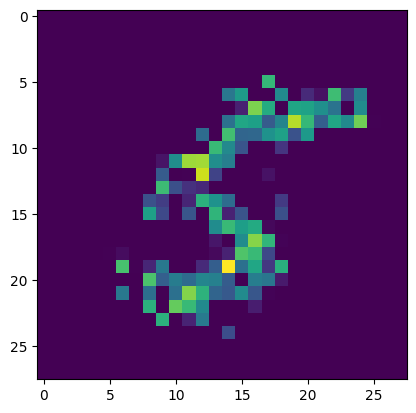

In [116]:
plt.imshow(images[0])